# Example 2.2

Of course the idea we have seen for Example 2.1 generalises to continuous distributions. Now let us demonstrate Example 2.2 of the lecture notes.

**Example 2.2.** In the lecture we have derived the sampler for exponential distribution:
\begin{align*}
p(x) = \text{Exp}(x;\lambda) = \lambda e^{-\lambda x}.
\end{align*}
We calculate the CDF
\begin{align*}
F_X(x) =& \int_{0}^x p(x') \mathrm{d} x', \\
=& \lambda \int_0^x e^{-\lambda x'} \mathrm{d} x', \\
=& {\lambda} \left[ -\frac{1}{\lambda} e^{- \lambda x'}\right]_{x' = 0}^x \\
=& 1 - e^{-\lambda x}.
\end{align*}
Deriving the inverse:
\begin{align*}
u =& 1 - e^{-\lambda x}\\
\implies x =& -\frac{1}{\lambda} \log (1 - u)\\
\implies F_X^{-1}(u) =& -\lambda^{-1} \log (1 - u).
\end{align*}
which gives us the sampler:
* Generate $u_i \sim \text{Unif}([0, 1])$
* $x_i = -\lambda^{-1} \log (1 - u_i)$.

Let us look at the code for this sampler.

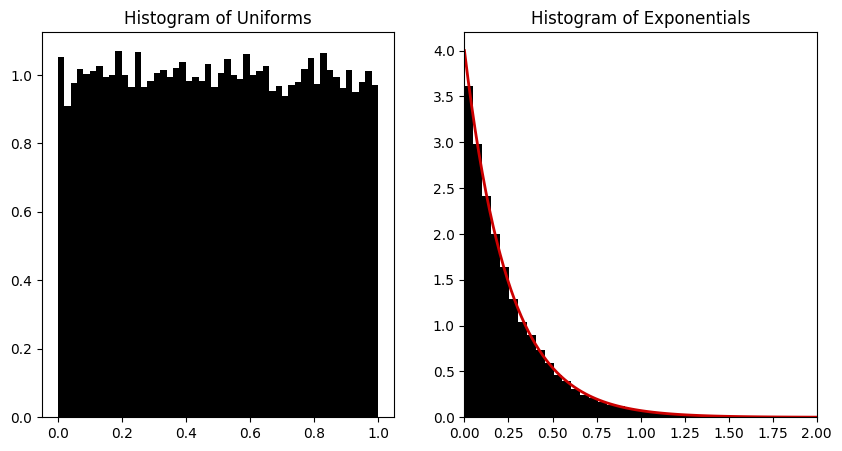

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

def exponential_cdf(x, lam):
    return 1 - np.exp(-lam * x)

# an illustration of inverse transform sampling for the exponential distribution
# with parameter lambda = 4
lam = 4
N = 50000

x = np.array([])
un = []
for n in range(N):
    u = rng.uniform(0, 1)
    un.append(u)
    x = np.append(x, -np.log(1 - u) / lam)

fig = plt.figure(figsize=(10, 5))
axs = fig.subplots(1, 2)

# plot u on the y axis
xx = np.linspace(0, 2, 100)
axs[0].hist(un, bins=50, density=True, color='k')
axs[0].set_title("Histogram of Uniforms")
axs[1].hist(x, bins=50, density=True, color='k')
axs[1].plot(xx, exponential_pdf(xx, lam), color=[0.8, 0, 0], linewidth=2)
axs[1].set_xlim(0, 2)
axs[1].set_title("Histogram of Exponentials")
plt.show()

## Animated sampling for the continuous case

It is important to visualise these processes to gain intuition. We can see that the sampler works as expected. Let us animate the continuous case.

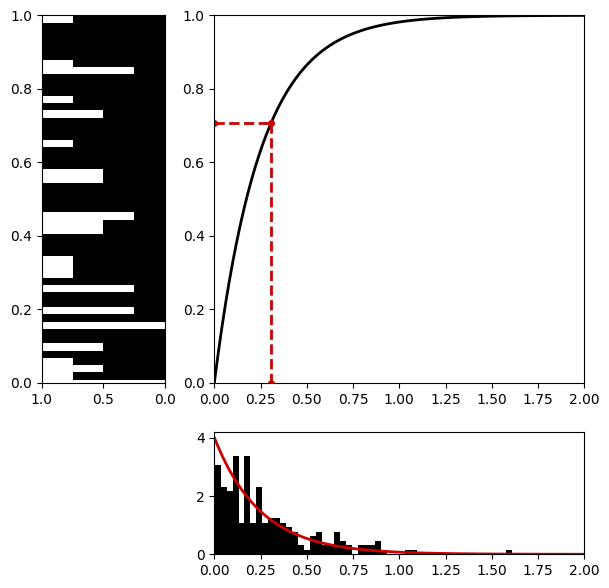

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

rng = np.random.default_rng(4)

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

def exponential_cdf(x, lam):
    return 1 - np.exp(-lam * x)

# an illustration of inverse transform sampling for the exponential distribution
# with parameter lambda = 4
lam = 4
N = 200

fig, axs = plt.subplots(2, 2, figsize=(7, 7), width_ratios=[1, 3], height_ratios=[3, 1])
x = np.array([])
un = []
def update(n):
    global un, x
    u = rng.uniform(0, 1)
    un.append(u)
    x = np.append(x, -np.log(1 - u) / lam)

    # print(x[n])
    if n % 1 == 0:
        # plot u on the y axis
        axs[0, 0].cla()
        axs[0, 1].cla()
        xx = np.linspace(0, 2, 100)
        axs[0, 1].plot(xx, exponential_cdf(xx, lam), color='k', linewidth=2)
        axs[0, 1].plot(0, u, 'o', color=[0.8, 0, 0], markersize=4)
        # plot the projection of u on the pdf
        axs[0, 1].plot(x[-1], u, 'o', color=[0.8, 0, 0], markersize=4)
        # plot a dashed line between the two points
        axs[0, 1].plot([0, x[-1]], [u, u], '--', color=[0.8, 0, 0], linewidth=2)
        axs[0, 1].plot([x[-1], x[-1]], [u, 0], '--', color=[0.8, 0, 0], linewidth=2)
        axs[0, 1].set_xlim(0, 2)
        axs[0, 1].set_ylim(0, 1)
        axs[0, 1].plot(x[-1], 0, 'o', color=[0.8, 0, 0], markersize=4)
        # plot on the axis on the left the histogram of un parallel to the y axis of the axs[0, 1] plot
        axs[0, 0].hist(un, bins=50, density=True, color='k', orientation=u'horizontal')
        axs[0, 0].set_ylim(0, 1)
        axs[0, 0].set_xlim(0, 1)
        axs[0, 0].invert_xaxis()
        axs[1, 1].cla()
        axs[1, 1].hist(x, bins=50, density=True, color='k')
        axs[1, 1].plot(xx, exponential_pdf(xx, lam), color=[0.8, 0, 0], linewidth=2)
        axs[1, 1].set_xlim(0, 2)
        # set horizontal orientation of the histogram on the right
        axs[1, 0].set_visible(False)

ani = FuncAnimation(fig, update, frames=N, repeat=False)
HTML(ani.to_jshtml())

One can see above the animation of uniform sample being sampled and *going through* the inverse of the CDF which eventually becomes a sample from the exponential density.

Using these examples, you can practice to implement other inversion methods in lecture notes. A good idea is to animate other examples using the code above.